In [104]:
from pathlib import Path
from astropy.table import Table
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import astropy.units as u
import numpy as np
import yaml
from enum import StrEnum

In [105]:
datapath = Path.cwd().parent / "cloudy"

## Set up options for the different model sets

Options for the density law of the models set to plot: constant density or constant pressure.

In [106]:
class DensityLaw(StrEnum):
    CONSTANT_DENSITY = "n"
    CONSTANT_PRESSURE = "p"

Options for Ha luminosity normalization. The LOW option assumes covering fraction of unity and use (1 - sigma) times observed flux.

In [107]:
class LuminosityNorm(StrEnum):
    STANDARD = "lha"
    LOW = "llha"
    FIXED_PRESSURE = "nT62"

## Choose which options to make the figure for


In [108]:
dlaw = DensityLaw.CONSTANT_PRESSURE
lnorm = LuminosityNorm.LOW

In [109]:
MODELSET = f"-{dlaw}-{lnorm}"

In [110]:
tab = Table.read(datapath / f"ou5a{MODELSET}-observables.csv")
df = tab.to_pandas()
df

,model,EOS,Z_amp,Z_lambda,HeII4686_Hb,HeI5016_Hb,OII4651_Hb,OIII5007_Hb,OIII4363_CO_Hb,OIII4363_RR_Hb,OIII4363_CX_Hb,OIII4363_Hb,OIII4363_over_OIII5007
0,ou5a-T115-L660-p-llha,const_P,0,homog,0.8745,0.01920,0.002351,16.550000,0.323200,0.000980,0.000511,0.324700,0.019620
1,ou5a-T115-L660-p-llha-Z06fluct-short,const_P,6,short,0.7255,0.02539,0.011470,10.210000,0.053620,0.002506,0.001177,0.057300,0.005613
2,ou5a-T115-L660-p-llha-Z06fluct-long,const_P,6,long,0.7795,0.02337,0.007746,13.180000,0.099170,0.003106,0.001145,0.103400,0.007844
3,ou5a-T115-L660-p-llha-Z15fluct-short,const_P,15,short,0.6735,0.02659,0.032460,0.215200,0.002577,0.005092,0.001347,0.009016,0.041890
4,ou5a-T115-L660-p-llha-Z15fluct-long,const_P,15,long,0.7493,0.02398,0.028560,1.076000,0.008271,0.006340,0.001382,0.015990,0.014860
5,ou5a-T115-L660-p-llha-Z30fluct-short,const_P,30,short,0.5050,0.03175,0.068120,0.009352,0.001549,0.006253,0.000916,0.008717,0.932100
6,ou5a-T115-L660-p-llha-Z30fluct-long,const_P,30,long,0.5640,0.02979,0.059750,0.089730,0.002707,0.007874,0.000928,0.011510,0.128300
7,ou5a-T115-L660-p-llha-Z60fluct-short,const_P,60,short,0.5516,0.02990,0.127900,0.003850,0.002053,0.011750,0.000988,0.014790,3.841000
8,ou5a-T115-L660-p-llha-Z60fluct-long,const_P,60,long,0.7710,0.02322,0.092140,0.010210,0.002884,0.017550,0.001029,0.021460,2.102000


<Axes: >

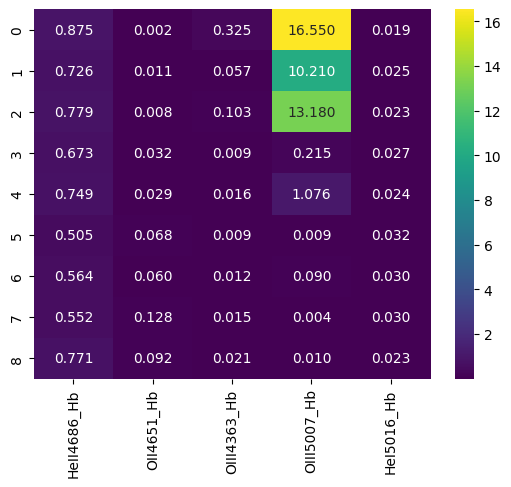

In [111]:
ratios = ["HeII4686_Hb", "OII4651_Hb", "OIII4363_Hb", "OIII5007_Hb", "HeI5016_Hb"]
sns.heatmap(df[ratios], cmap="viridis", annot=True, fmt=".3f")

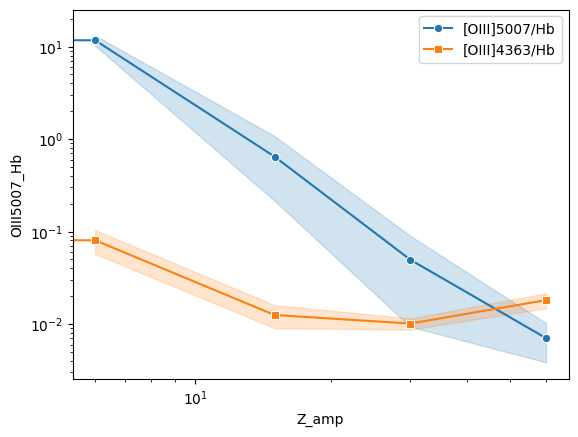

In [112]:
fig, ax = plt.subplots()
sns.lineplot(data=df, x="Z_amp", y="OIII5007_Hb", marker="o", label="[OIII]5007/Hb")
sns.lineplot(data=df, x="Z_amp", y="OIII4363_Hb", marker="s", label="[OIII]4363/Hb")
ax.set_xscale("log")
ax.set_yscale("log")

plt.legend()

In [113]:
df = df.assign(OIII4363c_over_OIII5007=df.OIII4363_CO_Hb / df.OIII5007_Hb)
df[["OIII4363_over_OIII5007", "OIII4363c_over_OIII5007"]]

,OIII4363_over_OIII5007,OIII4363c_over_OIII5007
0,0.019620,0.019529
1,0.005613,0.005252
2,0.007844,0.007524
3,0.041890,0.011975
4,0.014860,0.007687
5,0.932100,0.165633
6,0.128300,0.030168
7,3.841000,0.533247
8,2.102000,0.282468


In [114]:
yaml.load?

Signature: yaml.load(stream, Loader)
Docstring:
Parse the first YAML document in a stream
and produce the corresponding Python object.
File:      ~/Dropbox/teresa-pn-ou5/.venv/lib/python3.11/site-packages/yaml/__init__.py
Type:      function

In [115]:
df = df.assign(
    T_Ha = [
        yaml.safe_load((datapath / (stem + "-global.yaml")).read_text())["H  1 6562.80A"]["Mean Te"]
        for stem in df.model
    ]
)

In [116]:
yaml.safe_load?

Signature: yaml.safe_load(stream)
Docstring:
Parse the first YAML document in a stream
and produce the corresponding Python object.

Resolve only basic YAML tags. This is known
to be safe for untrusted input.
File:      ~/Dropbox/teresa-pn-ou5/.venv/lib/python3.11/site-packages/yaml/__init__.py
Type:      function

## Make the summary plot

In [118]:
tdict = {
    DensityLaw.CONSTANT_PRESSURE: "pressure",
    DensityLaw.CONSTANT_DENSITY: "density",
}

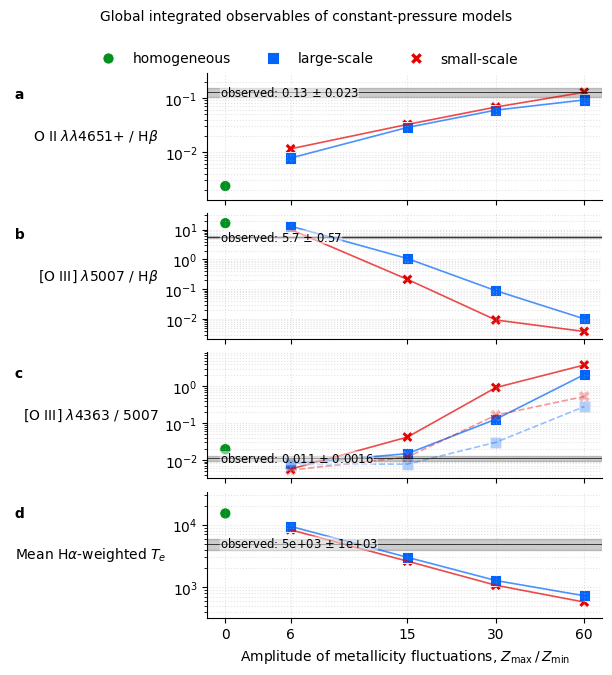

In [119]:

ratios = [
    # "HeII4686_Hb",
    # "HeI5016_Hb",
    "OII4651_Hb",
    "OIII5007_Hb",
    # "OIII4363_Hb",
    "OIII4363_over_OIII5007",
    "T_Ha",
]

# Estimate of spatial variation in line ratios (%). Added as source of error
e_spatial = 10
# From Corradi+(2015). Tuples of (Value, % error)
observed_ratios = {
    "HeII4686_Hb": (71/100, np.hypot(1, e_spatial)),
    "OII4651_Hb": (13.0/100, np.hypot(15, e_spatial)), # Summed components of V1 multiplet
    "OIII5007_Hb": (567/100, np.hypot(1, e_spatial)),
    "OIII4363_over_OIII5007": (6.33/567, np.hypot(10, e_spatial)),
    "T_Ha": (5000, 20),
}

labels = {
    "HeII4686_Hb": r"He II $\lambda$4686 / H$\beta$",
    "OII4651_Hb": r"O II $\lambda\lambda$4651+ / H$\beta$", 
    "OIII5007_Hb": r"[O III] $\lambda$5007 / H$\beta$",
    "OIII4363_over_OIII5007": r"[O III] $\lambda$4363 / 5007",
    "T_Ha": r"Mean H$\alpha$-weighted $T_e$",
}

# consistent palette/markers for Z_lambda
# hue_order = ["homog", "short", "long"]
# palette   = dict(zip(hue_order, sns.color_palette(n_colors=len(hue_order))))

palette = {
    "homog": "xkcd:emerald green",
    "long": "xkcd:bright blue",
    "short": "xkcd:red",
}
hue_order = list(palette)
style_kws = dict(
    markers={"homog": "o", "short": "X", "long": "s"}, 
)

# make compact vertical stack
height_per = 1.5  # inches per panel (shrink here to compress further)
fig, axes = plt.subplots(len(ratios), 1, figsize=(6, height_per*len(ratios)),
                         sharex=True, constrained_layout=True)

# draw once to capture legend artists from the first axis
for i, (ax, col) in enumerate(zip(axes, ratios)):
    # points
    sns.scatterplot(
        data=df, x="Z_amp", y=col, hue="Z_lambda", style="Z_lambda",
        hue_order=hue_order, palette=palette, s=65, ax=ax, **style_kws
    )
    # lines per Z_lambda
    for zlam, g in df.sort_values("Z_amp").groupby("Z_lambda"):
        ax.plot(g["Z_amp"], g[col], alpha=0.7, color=palette.get(zlam), lw=1.2)

    # Add in collisional-only ratio for 4363/5007
    if col == "OIII4363_over_OIII5007":
        colc = col.replace("4363", "4363c")
        sns.scatterplot(
            data=df, x="Z_amp", y=colc, hue="Z_lambda", style="Z_lambda",
            hue_order=hue_order, palette=palette, s=65, ax=ax, alpha=0.3, **style_kws
        )
        for zlam, g in df.sort_values("Z_amp").groupby("Z_lambda"):
            ax.plot(g["Z_amp"], g[colc], alpha=0.4, ls="dashed", color=palette.get(zlam), lw=1.2)
      
    # Add horizonal bands for observed values
    observed, e_observed = observed_ratios[col]
    eps = observed * e_observed / 100
    olabel = fr"observed: {observed:.2g} $\pm$ {eps:.2g}"
    ax.axhspan(
        observed - eps, observed + eps,
        alpha=0.2, color="k",
    )
    ax.axhline(observed, color="k", linestyle="solid", lw=0.5)
    ax.text(-0.5, observed, olabel, va="center", fontsize="small", bbox=dict(fc="w", lw=0, alpha=0.5, boxstyle="Round, pad=0.01"))
    
    ax.set_yscale("log")
    # symlog x: compress the linear segment around 0 to avoid the big gap
    ax.set_xscale("symlog", linthresh=6, linscale=0.2, subs=[1,2,3,4,5,6,7,8,9])

    # enforce ≥ 1 dex on y-range with a bit of padding
    y = df[col].to_numpy(dtype=float)
    y = y[np.isfinite(y) & (y > 0)]
    if y.size:
        logmin, logmax = np.log10(y.min()), np.log10(y.max())
        if logmax - logmin < 1.0:
            c = 0.5*(logmin + logmax)
            logmin, logmax = c - 0.5, c + 0.5
        # small padding
        ax.set_ylim(10**(logmin-0.25), 10**(logmax+0.35))

    ax.set_ylabel(labels[col], y=0.5, rotation=0, ha="right", va="center")
    ax.grid(True, which="both", ls=":", alpha=0.35)

    # remove per-panel legends; we’ll add a single figure legend below
    ax.legend_.remove()

# Add subfig labels
for ax, label in zip(axes, "abcd"):
    ax.text(-0.5, 0.8, " " + label, fontweight="heavy", transform=ax.transAxes)
   
# tidy x axis: show the discrete amplitudes you have
axes[-1].set_xlabel("Z_amp")
axes[-1].set_xticks([0, 6, 15, 30, 60])
axes[-1].set_xticklabels([str(s) for s in axes[-1].get_xticks()])

axes[-1].get_xaxis().set_minor_locator(plt.NullLocator())

axes[-1].set_xlabel(r"Amplitude of metallicity fluctuations, $Z_\mathrm{max} \,/\, Z_\mathrm{min}$")

# single legend (from the first axes)
handles, labels = axes[0].get_legend_handles_labels()
labelsubs = {
    "homog": "homogeneous",
    "long": "large-scale",
    "short": "small-scale",
}
fig.legend(
    handles, labelsubs.values(), ncol=3, frameon=False, 
    loc="upper center", bbox_to_anchor=(0.5, 1.05)
)
title = ( 
    fr"Global integrated observables of constant-{tdict[dlaw]} models"
)
fig.suptitle(title, x=0.5, y=1.1, ha="center", fontsize="medium")
sns.despine()
fig.savefig(f"ou5-cloudy-line-ratios-vs-observed{MODELSET}.pdf", bbox_inches="tight")